# ML with data obtained by parsing the IUPAC names predicting TDP1 inhibitors. PCA reduced features. 

### Content   <a name="content"></a>

1. [Load data](#1)
2. [Ensure equal number of target 1 and 0 in the test data](#2)
3. [Balance data](#3)
4. [PCA](#4)
5. [ML](#5)


### Load data <a name="1"></a>

In [1]:
import pandas as pd 

# loading the dataset for ML
df = pd.read_csv('data_IUPACs.csv', index_col=[0])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (19499, 3211)


,target,acetaldehyde,acetamide,acetamido,acetamidoacetyl,acetamidoanilino,acetamidobenzoate,acetamidocarbamothioyl,acetamidoethyl,acetamidomethyl,...,ynylN,ynylfuran,ynylimidazole,ynylindol,ynylpiperazine,ynylpyridine,ynylquinolin,ynylsulfanyl,ynylsulfanylpyrido,ynyltriazolo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[<a href="#content">Back to top</a>]

## Ensure equal number of target 1 and 0 in the testing set <a name="2"></a>

In [2]:
# from 140,213 samples  
df['target'].value_counts()

target
0    11593
1     7906
Name: count, dtype: int64

In [3]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 1650 samples (10% of 16,419 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:2000]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[2000:]

In [4]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:2000]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[2000:]

In [5]:
# Create train and test dataframes for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [6]:
# Shuffle the resulting data sets
train = train.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Shuffle the resulting data set
test = test.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

In [7]:
# Create the sets for ML 
X_train = train.drop(columns='target', axis=1)
y_train = train['target']
X_test =  test.drop(columns='target', axis=1)
y_test = test['target']

In [8]:
# Create the sets for Cross-validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])

In [9]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    2000
1    2000
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Balance data  <a name="3"></a>

[(0, 9593), (1, 5906)]


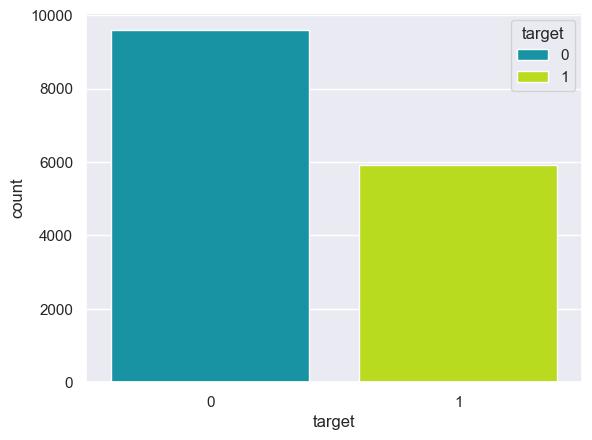

In [10]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 9593), (1, 9593)]


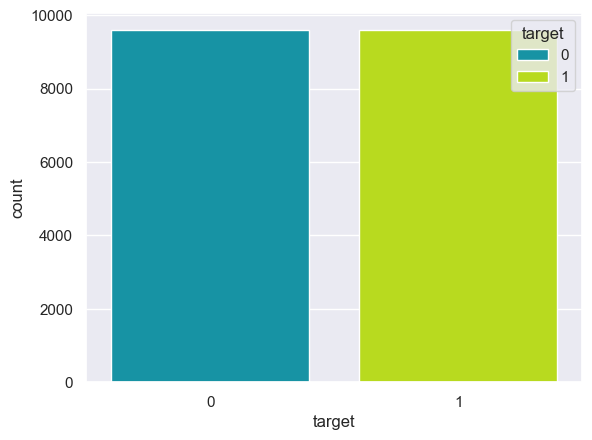

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Balance targets with RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

# Illustrate the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

[<a href="#content">Back to top</a>]

## PCA  <a name="4"></a>

In [12]:
import numpy as np

# Determine the number of the PCA components
# Scale the data points
# X_pca = sc.fit_transform(X_train)

# Mean
X_mean = X_train.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

# covariance
c = X.cov()

# Handle infinite values
c.replace([np.inf, -np.inf], np.nan, inplace=True)
c.fillna(c.mean(), inplace=True)

eigenvalues, eigenvectors = np.linalg.eig(c)

# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

n_components = np.argmax(explained_var >= 0.50) + 1
n_components

46

In [13]:
from sklearn.decomposition import PCA

# Fit PCA on the training set
pca = PCA(n_components=46)  # Adjust n_components as needed
pca.fit(X_train)

# Transform both training and test sets
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (19186, 46)
X_test:   (4000, 46)
y_train:  (19186,)
y_test:   (4000,)


[<a href="#content">Back to top</a>]

## ML  <a name="5"></a>

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Instantiate the estimator 
model = RandomForestClassifier()

# Train  
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.647
Precision:  0.705
Recall:  0.507
F1:  0.59
ROC:  0.647


In [15]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 31)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.596, test: 0.586
>2, train: 0.614, test: 0.599
>3, train: 0.623, test: 0.611
>4, train: 0.635, test: 0.618
>5, train: 0.651, test: 0.627
>6, train: 0.677, test: 0.627
>7, train: 0.713, test: 0.631
>8, train: 0.754, test: 0.637
>9, train: 0.801, test: 0.646
>10, train: 0.838, test: 0.650
>11, train: 0.862, test: 0.654
>12, train: 0.885, test: 0.655
>13, train: 0.905, test: 0.650
>14, train: 0.923, test: 0.649
>15, train: 0.941, test: 0.654
>16, train: 0.950, test: 0.655
>17, train: 0.964, test: 0.653
>18, train: 0.972, test: 0.643
>19, train: 0.979, test: 0.646
>20, train: 0.986, test: 0.651
>21, train: 0.990, test: 0.653
>22, train: 0.993, test: 0.654
>23, train: 0.995, test: 0.652
>24, train: 0.996, test: 0.652
>25, train: 0.997, test: 0.648
>26, train: 0.997, test: 0.652
>27, train: 0.998, test: 0.655
>28, train: 0.998, test: 0.660
>29, train: 0.998, test: 0.649
>30, train: 0.998, test: 0.647


[<a href="#content">Back to top</a>]